# Fitting a simple linear regression on Taxi data and performing 10 fold cross validation 

In [9]:
import numpy as np

import pandas as pd

import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn import linear_model


import matplotlib.pyplot as plt
%matplotlib inline

 We're going to be looking at the relationship between trip distance and tip amount.
 Are passengers who travel further tipping better than others?

Our first task is to import and clean the data. Import the data of the Jan 2017 yellow cab NYC trip data into a pandas data frame. Create a view on trip_distance and tip_amount. 

Plot the trip_distance vs. tip amount in a scatter plot.

The data set can be found here:
<http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml>

In [10]:
data = pd.read_csv("yellow_tripdata_2017-01.csv")
dis_amount = data[['trip_distance','tip_amount']]
dis_amount.head(5)

,trip_distance,tip_amount
0,3.30,2.00
1,0.90,1.45
2,1.10,1.00
3,1.10,1.70
4,0.02,0.00


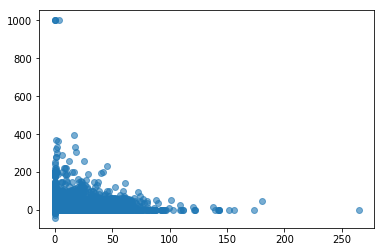

In [11]:
plt.scatter(dis_amount['trip_distance'],dis_amount['tip_amount'],alpha=0.6)
plt.show()

##  Remove the people who tipped nothing and filter the trip distance
People who tipped nothing aren't very useful for our needs. We are interesteded in how much they tipped when they were generous enough to do so. Similarly, we don't care about people that tipped for very short rides. Remove all records where the trip distance was less than 0.5 miles. Create a data frame with the records of zero (or less) tips removed and plot the relationship between the trip distance and the tip amount. Can  the resulting data frame 'df'.

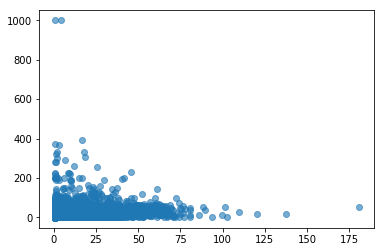

In [12]:
df=dis_amount[(dis_amount['trip_distance'] > 0.5) & dis_amount['tip_amount']!=0]
plt.scatter(df['trip_distance'],df['tip_amount'],alpha=0.6)
plt.show()



#  Fit a linear regression to the resulting trip_distance vs. tip_amount data

In [13]:
X = df['trip_distance'].values.reshape(-1,1)
y = df['tip_amount']
rgr=linear_model.LinearRegression().fit(X,y)

##  Look at the regression coefficients
Print the regression coefficients (intercept and slope) and in a markdown cell comment about their values. Do they make sense? What do they tell you?

In [14]:
 print(rgr.coef_)
 print(rgr.intercept_)


[0.55748074]
1.0559361695805967


##
In linear regression, beta1=0.5574.  Regression coefficient represents slope, average chaange in tip amount when distance increases by 1 mile.

In this case, when distance traveled increases by 1 mile, the avaerge tip amount changes about 0.55 dollars

## Evaluate the model using k-fold cross validation
Just because the model fit the data set doesn't mean it's very predictive. Run a 10-fold cross-validation and compute the average mean absolute deviation. Show the result. In a markdown cell comment on what that number means in terms of predictive accuracy.

In [15]:
scores = cross_validate(rgr, X, y, cv=10, scoring='neg_median_absolute_error', return_train_score=False)

np.mean(-1*scores['test_score'])

0.3891952585548195

The Average mean absolute deviation is 0.3891. 

When we are trying to fit our linear regression model, we expect a deviance of 0.3819 dollars from the average tip amount we predict